**Lab details:**
- Natural language Processing (NLP) - CS429
- Lab Session-3
- Date- 26/08/2025
- Marks - 10

**Instruction:**
1) The name of your Python file must follow this format: **studentID_Name**
   - Example: If Student ID = 2022B3A70617P and Name = Nikhil Manvendra Singh
   - File name should be: 2022B3A70617P_Nikhil_Manvendra_Singh.ipynb
2) Submission Deadline: 6:15 PM (Today)
3) Students are required to fill the blanks with code syntax in the section provided below and Attempt evaluative question

This Labsheet contains the basics of Naïve Bayes Classifier and an application in Sentiment Analysis. Classification lies at the heart of both human and machine intelligence. Sentiment Analysis here just refers to text categorization (classification) based on some sentiment, a positive or negative inclination towards any matter. The simplest version of sentiment analysis is a binary classification task, which we shall study in this labsheet.

### --------------------------------------------------------Lab Section--------------------------------------------------------------

## Naïve Bayes Classifier:

Naive Bayes algorithm is a probabilistic algorithm based on the famous "Bayes Theorem".

$$P(c|x) = \frac{P(x|c) \cdot P(c)}{P(x)}$$


where
- 𝑃(𝑐|𝑥) is the posterior probability of class given predictor
- 𝑃(𝑥|𝑐) is the probability of predictor given class 
- 𝑃(𝑐)is the probability of class 
- 𝑃(𝑥) is the prior probability of predictorx.

When we know how frequent a class occurs (𝑃(𝑐)), how frequent a predictor occurs (𝑃(𝑥)) and the probability of a predictor given the class (𝑃(𝑥|𝑐)), we can calculate how often a class occurs given the predictor (𝑃(𝑐|𝑥)).

In real-life machine learning problem, there are typically multiple predictors of a class instead of a single predictor 𝑥. Hence, the formula becomes more complicated considering the possible dependence between the predictors. Let's have a look at an example with 3 features.

$$
P(\text{class} \mid x_1, x_2, x_3) = \frac{P(\text{class} \cap (x_1, x_2, x_3))}{P(x_1, x_2, x_3)}
$$

$$
P(\text{class} \mid x_1, x_2, x_3) \propto P(\text{class} \cap x_1 \cap x_2 \cap x_3)
$$

$$
P(\text{class} \mid x_1, x_2, x_3) \propto P(x_1 \cap x_2 \cap x_3 \cap \text{class})
$$


Next, we can use the multiplication rule of probability to expand 𝑃(𝑥1∩𝑥2∩𝑥3∩𝑐𝑙𝑎𝑠𝑠)

$$
P(x_1 \cap x_2 \cap x_3 \cap \text{class}) = P(x_1 \mid x_2 \cap x_3 \cap \text{class}) \cdot P(x_2 \cap x_3 \cap \text{class})
$$

$$
P(x_1 \cap x_2 \cap x_3 \cap \text{class}) = P(x_1 \mid x_2 \cap x_3 \cap \text{class}) \cdot P(x_2 \mid x_3 \cap \text{class}) \cdot P(x_3 \cap \text{class})
$$

$$
P(x_1 \cap x_2 \cap x_3 \cap \text{class}) = P(x_1 \mid x_2 \cap x_3 \cap \text{class}) \cdot P(x_2 \mid x_3 \cap \text{class}) \cdot P(x_3 \mid \text{class}) \cdot P(\text{class})
$$


As you can see, the equation is getting pretty long for just three features. Imagine if we would like to train a sentiment classifier based on 10,000+ texts, it would require a lot of calculations. This is where the Naive Bayes's assumption of conditional independence between predictors helps. With the assumption, the formula can be simplified to

$$
P(x_1 \cap x_2 \cap x_3 \cap \text{class}) = P(x_1 \mid \text{class}) \cdot P(x_2 \mid \text{class}) \cdot P(x_3 \mid \text{class}) \cdot P(\text{class})
$$


Hence, the Naive Bayes algorithm can be summarized as:

$$
P(\text{class} \mid x_1, x_2, x_3) \propto P(x_1 \mid \text{class}) \cdot P(x_2 \mid \text{class}) \cdot P(x_3 \mid \text{class}) \cdot P(\text{class})
$$

$$
P(\text{class} \mid x_1, x_2, \ldots, x_n) \propto P(\text{class}) \cdot \prod_{i=1}^n P(x_i \mid \text{class})
$$


It is good to note that the assumption of independence between predictors is unrealistic in practice. For example, certain words such as "happy", "fantastic" and "great" are more likely to appear together (i.e., dependent). As the assumption rarely holds in practice, the algorithm is called Naïve Bayes.

Despite the simplifying assumption, Naïve Bayes is an easy and fast model that works pretty well in many real-world problems. With the understanding of the algorithm, let's now implement it from scratch to detect hate speech in tweets (sentiment analysis). Note that we shall revisit sentiment analysis using neural networks (deep learning) after some labs, but this labsheet shall focus only on the Naïve Bayes Algorithm taught in class, and what we revisited in the details above.

## Implementation of Naive Bayes Classification from Scratch

### 1. Load the Dataset

In [ ]:
!pip install numpy
!pip install pandas

  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.0 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.0 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.9 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 2.8 MB/s eta 0:00:03
   ------------------- -------------------- 5.2/11.0 MB 4.5 MB/s eta 0:00:02
 

In [4]:
import numpy as np
import pandas as pd

In [5]:
tweets = pd.read_csv('tweet_sentiment.csv')
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
# Rename Columns, Drop `id`, and Check Label Counts
tweets.rename(columns={'label':'Label', 'tweet':'Tweet'}, inplace=True)  
tweets.drop(columns=['id'], inplace=True)    
tweets.Label.value_counts()  

Label
0    29720
1     2242
Name: count, dtype: int64

In [7]:
# Filtered Dataset: 3000 Negative & All Positive tweets
df_class0 = tweets[tweets['Label'] == 0].sample(n=3000, random_state=42)  # 3000 samples where sentiment == 0
df_class1 = tweets[tweets['Label'] == 1]  # All records where sentiment == 1
tweets = pd.concat([df_class0, df_class1], axis=0).reset_index(drop=True) # Combine both
print("Shape:", tweets.shape)
print(tweets['Label'].value_counts())

Shape: (5242, 2)
Label
0    3000
1    2242
Name: count, dtype: int64


### 2. Creating Training and Testing Data [1M]

In [12]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

# Split data into train and test sets with ratio of 80:20
# IMPORTANT:
# - Preserve label distribution → use stratify
# - Use random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    tweets['Tweet'], tweets['Label'], test_size= 0.2, stratify= tweets['Label'], random_state=1   # Fill here
)

# Combine the results into train and test dataframes
tweets_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
tweets_test = pd.concat([X_test, y_test], axis = 1).reset_index(drop=True)  # Fill here

print("Counts of Train data:", len(tweets_train))
print("Counts of Test data:", len(tweets_test))

# Check a few rows
tweets_train.head()

Counts of Train data: 4193
Counts of Test data: 1049


,Tweet,Label
0,so exo dropped 2 music videos today and i have...,0
1,"@user its father's day, n my father passsed aw...",0
2,#italians weren't coming from a country were w...,1
3,i am thankful for vacation days. #thankful #po...,0
4,ok. this logres book is getting interesting. ...,0


### 3. Data Preprocessing [2M]

We need to first preprocess the tweets to remove hashtags, mentions, punctuations, stopwords, website links, non-alphanumeric characters, single characeter and extra spaces. Here, we'll use nltk built-in TweetTokenizer to tokenize the sentence. It generally works better than the normal nltk word_tokenize function as it splits the sentence by taking into consideration of the common patterns seen in tweets (e.g., mention, hashtags, emoji).

In [15]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.7 MB/s  0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------

In [22]:
import re
from re import sub
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [23]:
# Initialize objects once (not inside function)
twt_tokenizer = TweetTokenizer(strip_handles=True)
stops = set(stopwords.words("english")) | set(string.punctuation)
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    """
    Clean and tokenize tweets:
    - Remove handles, hashtags, urls
    - Lowercase
    - Remove stopwords, punctuation, non-alphanumeric, single chars
    - Lemmatize tokens
    """

    # Remove URLs before tokenizing
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)  # HINT: use re.sub()

    # Tokenize
    tokens = twt_tokenizer.tokenize(tweet)  # HINT: use twt_tokenizer

    # Remove hashtag symbol but keep the word
    tokens = [re.sub(r"#", "", token) for token in tokens]

    # Lowercase + remove stopwords & punctuation
    tokens = [token.lower() for token in tokens if token.lower() not in stops]   # HINT: use .lower() and check in stops

    # Keep only alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]   # HINT: use str.isalnum()

    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # HINT: use lemmatizer

    # Remove single-character tokens
    tokens = [t for t in tokens if len(t) > 1]

    return tokens


In [24]:
# Apply to dataframe column
tweets_train["Tweet"] = tweets_train["Tweet"].apply(clean_tweet)
tweets_train.head()

,Tweet,Label
0,"[exo, dropped, music, video, today, seen, eith...",0
1,"[day, father, passsed, away, hey]",0
2,"[italian, coming, country, woman, stoned, ente...",1
3,"[thankful, vacation, day, thankful, positive]",0
4,"[ok, logres, book, getting, interesting]",0


### 4. Naïve Bayes Model [2M]

In order to calculate 𝑃(𝑥𝑖|𝑐𝑙𝑎𝑠𝑠), we need to use the following equation.

$$
P(x_i \mid \text{class}) = \frac{N_{x_i|\text{class}} + \alpha}{N_{\text{class}} + \alpha \cdot N_{\text{Vocabulary}}}
$$


- 𝑁𝑥𝑖|𝑐𝑙𝑎𝑠𝑠: total number of a word given the class
- 𝑁𝑐𝑙𝑎𝑠𝑠: total number of all the words in the class
- 𝑁𝑉𝑜𝑐𝑎𝑏𝑢𝑙𝑎𝑟𝑦: total number of all the words in all classes
- 𝛼: Laplace smoothing parameter. This is a non-zero parameter (usually set as 1) to tackle the zero-probability problem in Naive Bayes algorithm. 

#### 4.1 Create Vocabulary

Let's create the vocabulary, which includes all the unique words in the entire training dataset.

In [25]:
# Create Vacabulary
vocab = []
for index, value in tweets_train['Tweet'].items():
    for word in value:
        vocab.append(word)
        
vocab = list(set(vocab))  # remove duplicate words
print("Number of vocabularies in the training set is : {}".format(len(vocab)))

Number of vocabularies in the training set is : 9718


#### 4.2 Vocabulary–Tweet Occurrence Table

Next, we need to transform the training dataset to include columns of vocabularies and the occurrence of each vocabulary in each tweet. 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# TASK:
# - Combine all tweets in training set into a single list of strings
# - Use CountVectorizer to convert tweets into Bag-of-Words representation

# TODO: Combine all the tweets into a single list
corpus = tweets_train['Tweet'].apply(lambda x: " ".join(x) )

# TODO: Initialize and fit CountVectorizer on the corpus
vectorizer = CountVectorizer()

X_train_wc = vectorizer.fit_transform(corpus)

# Display transformed training data
X_train_wc

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 31076 stored elements and shape (4193, 9718)>

In [27]:
vocab_counts = pd.DataFrame(X_train_wc.toarray(), columns=vectorizer.get_feature_names_out())
tweets_train = pd.concat([tweets_train, vocab_counts], axis=1)  # Concatenate vocab_counts with the original dataframe
tweets_train.head()

,Tweet,Label,05068231,0608,0612,08,09,10,100,1000,...,ªã,ªé,ªð,µï,µð,ºâ,ºéº,ºï,ºð,êµ
0,"[exo, dropped, music, video, today, seen, eith...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[day, father, passsed, away, hey]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[italian, coming, country, woman, stoned, ente...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[thankful, vacation, day, thankful, positive]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[ok, logres, book, getting, interesting]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4.3 Calculate Priors and Conditional Probabilities [2M]

Next, let's calculate total number of words in each class. Then, we can calculate the conditional probability of occurrence of each word given the class and use them to predict whether a tweet contains hate speech. Recollect the formula:

$$
P(x_i \mid \text{class}) = \frac{N_{x_i|\text{class}} + \alpha}{N_{\text{class}} + \alpha \cdot N_{\text{Vocabulary}}}
$$


In [30]:
# Calculate Prior Probabilities

# TASK:
# Calculate prior probabilities:
# P(hate)   = (# of hate tweets / total tweets)
# P(non-hate) = (# of non-hate tweets / total tweets)

# TODO: Fill in the missing code to calculate class priors
p_hate    = tweets_train['Label'].value_counts(normalize=True)[1]   # HINT: use 1 for hate
p_nonhate = tweets_train['Label'].value_counts(normalize=True)[0]   # HINT: use 0 for non-hate

print("P(hate) =", p_hate, ", P(non-hate) =", p_nonhate)


P(hate) = 0.42761745766754117 , P(non-hate) = 0.5723825423324589


In [31]:
# Word Counts & Vocabulary Size

alpha = 1  # Set Laplace smoothing parameter (to avoid zero probabilities)

# TASK:
# - Count total number of words in hate tweets (N_hate)
# - Count total number of words in non-hate tweets (N_nonhate)
# - Get vocabulary size (N_vocab)

# TODO: Calculate N_hate (total words in hate class)
n_hate = tweets_train.loc[tweets_train['Label'] == 1, 'Tweet'].apply(len).sum()

# TODO: Calculate N_nonhate (total words in non-hate class)
n_nonhate = tweets_train.loc[tweets_train['Label'] == 0, 'Tweet'].apply(len).sum()

# TODO: Size of vocabulary
n_vocab = len(vocab)

print("N_hate =", n_hate, ", N_nonhate =", n_nonhate, ", Vocab size =", n_vocab)

N_hate = 13971 , N_nonhate = 18149 , Vocab size = 9718


In [32]:
# Conditional Probabilities

# TASK:
# For each word in vocabulary, calculate:
# P(word | hate)     = (count(word in hate) + alpha) / (N_hate + alpha * V)
# P(word | non-hate) = (count(word in non-hate) + alpha) / (N_nonhate + alpha * V)

# Initialize dictionaries
parameters_hate    = {word: 0 for word in vocab}
parameters_nonhate = {word: 0 for word in vocab}

# TODO: Calculate conditional probabilities
for word in vocab:
    n_word_given_hate    = tweets_train.loc[tweets_train['Label'] == 1, word].sum()
    n_word_given_nonhate = tweets_train.loc[tweets_train['Label'] == 0, word].sum()

    parameters_hate[word]    = (n_word_given_hate + alpha) / (n_hate + alpha * n_vocab)
    parameters_nonhate[word] = (n_word_given_nonhate + alpha) / (n_nonhate + alpha * n_vocab)

### 5. Classifying a New Tweet and Evaluation [2M]

Now, we have all the components ready to build the classifier for hate speech detection. The steps of sentiment analysis are:
- Take in a new tweet (𝑥1, 𝑥2, … , 𝑥𝑛) as input
- Calculate 𝑃(ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛) and 𝑃(𝑛𝑜𝑛_ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛)
- Compare 𝑃(ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛) and 𝑃(𝑛𝑜𝑛_ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛)
  - If 𝑃(ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛) > 𝑃(𝑛𝑜𝑛_ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛), tweet is classified as containing hate speech
  - If 𝑃(ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛) < 𝑃(𝑛𝑜𝑛_ℎ𝑎𝑡𝑒|𝑥1, 𝑥2, … , 𝑥𝑛), tweet is classified as not containing hate speech

In [33]:
# TASK:
# - Preprocess the input tweet
# - Start with prior probabilities (p_hate, p_nonhate)
# - For each word, multiply conditional probabilities if word exists in training
# - Return predicted class (1 = hate, 0 = non-hate)

def classify_new_tweet(tweet):
    # TODO: Preprocess new tweet
    words = clean_tweet(tweet)    # HINT: use clean_tweet
    
    # TODO: Initialize with priors
    p_hate_given_words    = p_hate
    p_nonhate_given_words = p_nonhate
    
    # Loop through each word in the tweet
    for word in words:
        # Multiply conditional probabilities if word seen in training vocab
        if word in parameters_hate:
            p_hate_given_words *= parameters_hate[word]
                
        if word in parameters_nonhate:
            p_nonhate_given_words *= parameters_nonhate[word]
    
    # TODO: Choose class with higher probability
    if p_hate_given_words > p_nonhate_given_words:
        return 1   # hate
    else:
        return 0   # non-hate


# Apply classifier on test data
tweets_test['Predicted_scratch'] = tweets_test['Tweet'].apply( classify_new_tweet )
tweets_test['Correct_scratch']   = (tweets_test['Label'] == tweets_test['Predicted_scratch'])

# Preview results
tweets_test.head()


,Tweet,Label,Predicted_scratch,Correct_scratch
0,another comment on social media!! idiot!!!,1,1,True
1,"to all of those, who answer replies to my you...",1,0,False
2,"@user #patriarchal, #misogynist, cult. #chris...",1,1,True
3,stop bullying. stop racism. everyone can stand...,1,1,True
4,@user #allahsoil we should not conflate islami...,1,1,True


### Evaluate the accuracy of the model

In [34]:
# Calculate accuracy of scratch NB
accuracy_scratch = tweets_test['Correct_scratch'].mean()
print("Scratch NB Accuracy:", accuracy_scratch)

Scratch NB Accuracy: 0.9008579599618685


## Implementation Using SKlearn [1M]

In [35]:
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

In [36]:
# Convert y_train and y_test to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [37]:
# Clean + join test tweets into a string corpus
corpus_test = tweets_test['Tweet'].apply(clean_tweet).apply(lambda x: ' '.join(x))

# Use the same vectorizer as training to transform test data
X_test_wc = vectorizer.transform(corpus_test)

# Check shapes
print("Shape of X_train: {}".format(X_train_wc.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test_wc.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (4193, 9718)
Shape of y_train: (4193,)
Shape of X_test: (1049, 9718)
Shape of y_test: (1049,)


In [38]:
# Train Naive Bayes classifier
clf = MultinomialNB(alpha=1.0)   # Laplace smoothing by default
clf.fit(X_train_wc, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [39]:
# Evaluate accuracy on test set
accuracy = clf.score(X_test_wc, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9008579599618685


In [41]:
!pip install matplotlib

  Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.9 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.w

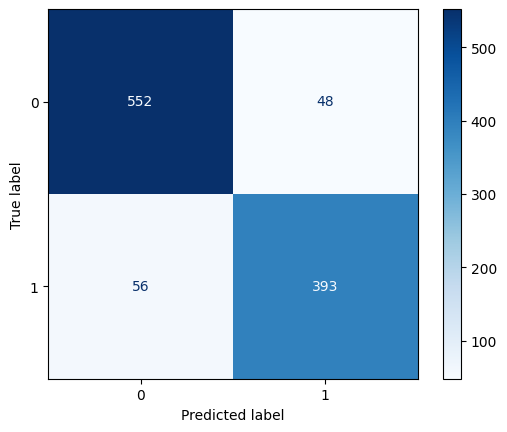

In [42]:
# Confusiion Matrix
y_pred = clf.predict(X_test_wc)  # Predict labels on the test set
cm = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")

In [43]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=clf.classes_.astype(str))
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       600
           1       0.89      0.88      0.88       449

    accuracy                           0.90      1049
   macro avg       0.90      0.90      0.90      1049
weighted avg       0.90      0.90      0.90      1049

